# Linear Regression

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

## Get training data

In [7]:
dfx = pd.read_csv("../Datasets/Linear Regression/linearX.csv")
dfy = pd.read_csv("../Datasets/Linear Regression/linearY.csv")

x = dfx.values
y = dfy.values

print(x.shape)
print(y.shape)

(99, 1)
(99, 1)


## Visualize and preprocess data

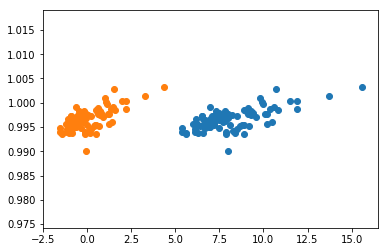

In [9]:
plt.scatter(x,y)
X = (x-x.mean())/x.std()
Y = y
plt.scatter(X,Y)
plt.show()

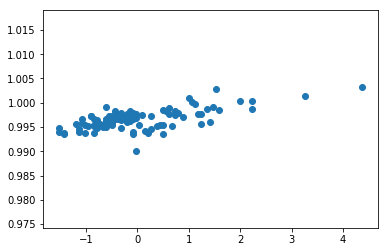

In [10]:
plt.scatter(X,Y)
plt.show()

## Algorithm
- Start with random theta
- Repeat until convergence
    - Update theta according to rule

In [90]:
def hypotheses(x,theta):
    return theta[0] + x*theta[1]

def error(X,Y,theta):
    err = 0
    for i in range(X.shape[0]):
        err += (hypotheses(X[i],theta) - Y[i])**2
    return err

def gradient(X,Y,theta):
    grad = np.zeros((2,))
    for i in range(X.shape[0]):
        grad[0] += (hypotheses(X[i],theta) - Y[i])
        grad[1] += (hypotheses(X[i],theta) - Y[i])*X[i]
    return grad
    
def gradientDescent(X,Y,learningRate=0.001, maxItr=100, maxErr=0.001):
    # Initializing with this theta to get better visualization of trajectory
    theta = np.array([-2.0,-3.0])
    error_list = []
    theta_list = []
    while maxItr:
        theta_list.append((theta[0],theta[1]))
        err = error(X,Y,theta)
        if(err<maxErr):
            break
        error_list.append(err)
        theta -= learningRate*gradient(X,Y,theta)
        maxItr -= 1
    return theta,error_list,theta_list

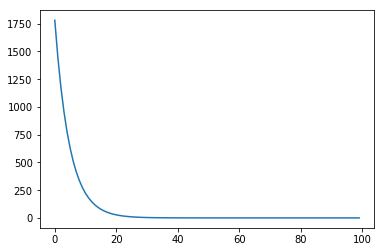

In [91]:
theta,error_list,theta_list = gradientDescent(X,Y,maxErr=0.0001)
plt.plot(error_list)
plt.show()

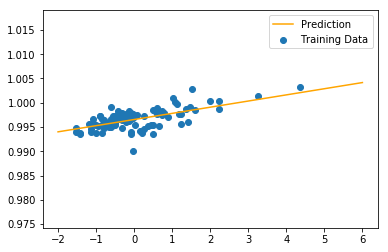

In [92]:
xTest = np.linspace(-2,6,10)
plt.scatter(X,Y,label='Training Data')
plt.plot(xTest,hypotheses(xTest,theta),color='orange', label='Prediction')
plt.legend()
plt.show()

## Visualizing Gradient Descent
plotting error surface and contours

In [93]:
T0 = np.arange(-2,3,0.01)
T1 = T0

T0,T1 = np.meshgrid(T0,T1)

J = np.zeros(T0.shape)

for i in range(T0.shape[0]):
    for j in range(T0.shape[1]):
        J[i,j] = np.sum((T0[i,j]+T1[i,j]*X-Y)**2)

print(J.shape)

(500, 500)


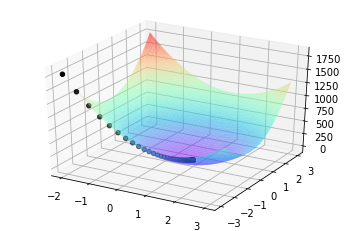

In [95]:
# Plot 3D loss
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow',alpha=0.5)
theta_list = np.array(theta_list)
axes.scatter(theta_list[:,0], theta_list[:,1],error_list, c='black')
plt.show()

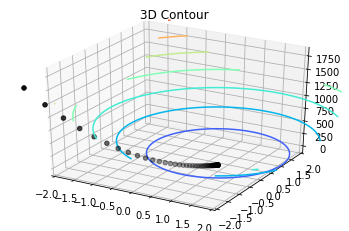

In [96]:
# Plot contour
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.set_xlim([-2,2])
axes.set_ylim([-2,2])
axes.contour(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[:,0], theta_list[:,1],error_list, c='black')
plt.title("3D Contour")
plt.show()

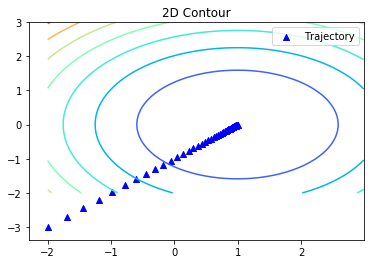

In [98]:
plt.contour(T0,T1,J,cmap='rainbow')
plt.title("2D Contour")
plt.scatter(theta_list[:,0], theta_list[:,1], c='blue',marker='^', label='Trajectory')
plt.legend()
plt.show()